# 1. Reading and getting the feel of the data

In [34]:
#Importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df=pd.read_csv('Online+Retail.csv', encoding='cp1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# 2. Cleaning the data

In [6]:
#If the number of missing values are less than they can be removed but if the percentage of missing values is high,
#then the column can be removed rather than the rows because if done the first thing we will loose on a lot of data.

df.isnull().sum()/df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
df=df.dropna()
df.shape

(406829, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
df['Amount']=df.UnitPrice * df.Quantity
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


# 3. Data Preparation

Preparing the data as per the most followed convention in customer segmentation in retail industry RFM:

R: Recency

F: Frequency

M: Monetary

In [11]:
prep_df=df.groupby(by='CustomerID')['Amount'].sum()
prep_df=prep_df.reset_index()
prep_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
freq_df=df.groupby(by='CustomerID')['InvoiceNo'].count()
freq_df=freq_df.reset_index()
freq_df.columns=['CustomerID', 'Frequency']
freq_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
prep_df=pd.merge(prep_df, freq_df, on='CustomerID', how='inner')
prep_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [16]:
max_date=max(df['InvoiceDate'])

In [17]:
df['Date_diff']= max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
recency_df=df.groupby(by='CustomerID')['Date_diff'].min()

In [19]:
recency_df=recency_df.reset_index()
recency_df.columns=['CustomerID', 'Recency']
recency_df.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
prep_df=pd.merge(prep_df, recency_df, on='CustomerID', how='inner')
prep_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [21]:
prep_df['Recency']=prep_df['Recency'].dt.days
prep_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## 2 main important pre-processing techniques to be taken care in clustering
1. Outlier treatment
2. Rescaling

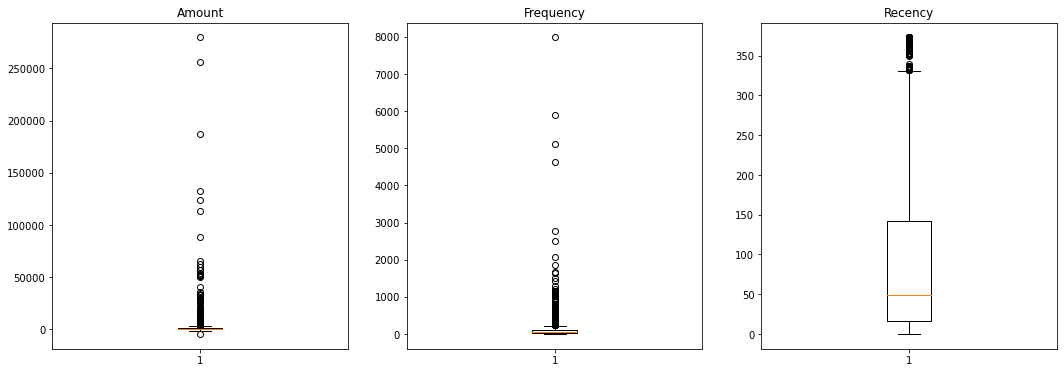

In [22]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.boxplot(prep_df['Amount'])
plt.title('Amount')
plt.subplot(1,3,2)
plt.boxplot(prep_df['Frequency'])
plt.title('Frequency')
plt.subplot(1,3,3)
plt.boxplot(prep_df['Recency'])
plt.title('Recency')
plt.show()

In [23]:
prep_df[prep_df['Amount']>100000]

,CustomerID,Amount,Frequency,Recency
55,12415.0,123725.45,778,23
1345,14156.0,113384.14,1420,9
1703,14646.0,279489.02,2085,1
1895,14911.0,132572.62,5903,0
3758,17450.0,187482.17,351,7
4233,18102.0,256438.49,433,0


In [24]:
statistical_outlier_amount=prep_df[prep_df['Amount']>100000]['Amount'].sum()
Percent_contributed_by_statistical_outliers= 100 * (statistical_outlier_amount/prep_df['Amount'].sum())
Percent_contributed_by_statistical_outliers

13.16967737962083

Since the contribution of customers which seems like statistical outliers is 13%, not dropping them. Rather they can end up being in one cluster as very valuable customers.

In [25]:
prep_df[prep_df['Frequency']>3000]

,CustomerID,Amount,Frequency,Recency
330,12748.0,29072.10,4642,0
1300,14096.0,57120.91,5128,3
1895,14911.0,132572.62,5903,0
4042,17841.0,40340.78,7983,1


Since the recency of these customers is also less, they might be shopping rehgularly hence they also form an important segment  for our analysis

In [26]:
prep_df[prep_df['Recency']>300]['Recency'].count()

272

In [27]:
prep_df[prep_df['Recency']>300]

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
4,12350.0,334.40,17,309
23,12373.0,364.60,14,310
26,12377.0,1628.12,77,314
33,12386.0,401.90,10,337
...,...,...,...,...
4288,18176.0,448.65,33,353
4314,18212.0,248.42,43,325
4334,18233.0,440.00,1,325
4350,18256.0,-50.10,4,354


### Outlier treatment.

In [28]:
q1=prep_df.Amount.quantile(0.05)
q3=prep_df.Amount.quantile(0.95)
IQR=q3-q1
prep_df=prep_df[(prep_df.Amount>=(q1-1.5 * IQR)) & (prep_df.Amount <= (q3+1.5 * IQR))]
prep_df.shape

#Treating outliers of Frequency
q1=prep_df.Frequency.quantile(0.05)
q3=prep_df.Frequency.quantile(0.95)
IQR=q3-q1
prep_df=prep_df[(prep_df.Frequency>=(q1-1.5 * IQR)) & (prep_df.Frequency <= (q3+1.5 * IQR))]
prep_df.shape

#Treating outliers of Recency
q1=prep_df.Recency.quantile(0.05)
q3=prep_df.Recency.quantile(0.95)
IQR=q3-q1
prep_df=prep_df[(prep_df.Recency>=(q1-1.5 * IQR)) & (prep_df.Recency <= (q3+1.5 * IQR))]
prep_df.shape

(4293, 4)

In [29]:
#Rescaling. StandardScaler: Mean is 0, standard deviation is 1
scaler=StandardScaler()

scaled_df=scaler.fit_transform(prep_df[['Amount', 'Frequency', 'Recency']])
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['Amount', 'Frequency', 'Recency']
scaled_df.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Hopkins Statistic

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Some usefull links to understand Hopkins Statistics:
- [WikiPedia](https://en.wikipedia.org/wiki/Hopkins_statistic)
- [Article](http://www.sthda.com/english/articles/29-cluster-validation-essentials/95-assessing-clustering-tendency-essentials/)

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
for i in range(0,10):
    print(hopkins(prep_df[['Amount', 'Frequency', 'Recency']]))

0.9566017614266085
0.9529955913341774
0.9628711851116397
0.9557047525299242
0.9603855471190671
0.9586818402497996
0.9533927877767593
0.9595087080863324
0.9578267485623305
0.9526317329499098


After multiple iterations of Hopkins statistic, value is 0.99 equivalent to 1.
Hence it has a high tendency to cluster.

# 4. Model

In [32]:
scaled_df.shape

(4293, 3)

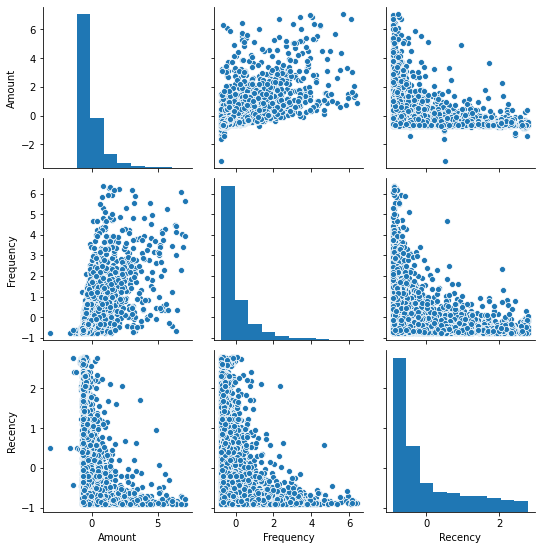

In [33]:
sns.pairplot(scaled_df)
plt.show()

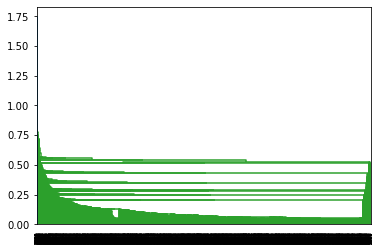

In [37]:
#Single linkage
mergings=linkage(scaled_df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

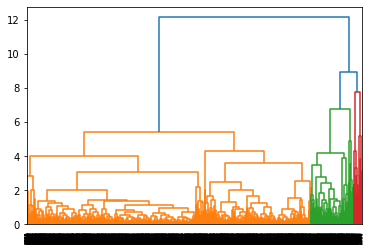

In [39]:
#complete linkage
mergings=linkage(scaled_df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [40]:
cluster_array=cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_array

array([0, 1, 0, ..., 0, 0, 0])

In [41]:
prep_df['Cluster_id']=cluster_array
prep_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


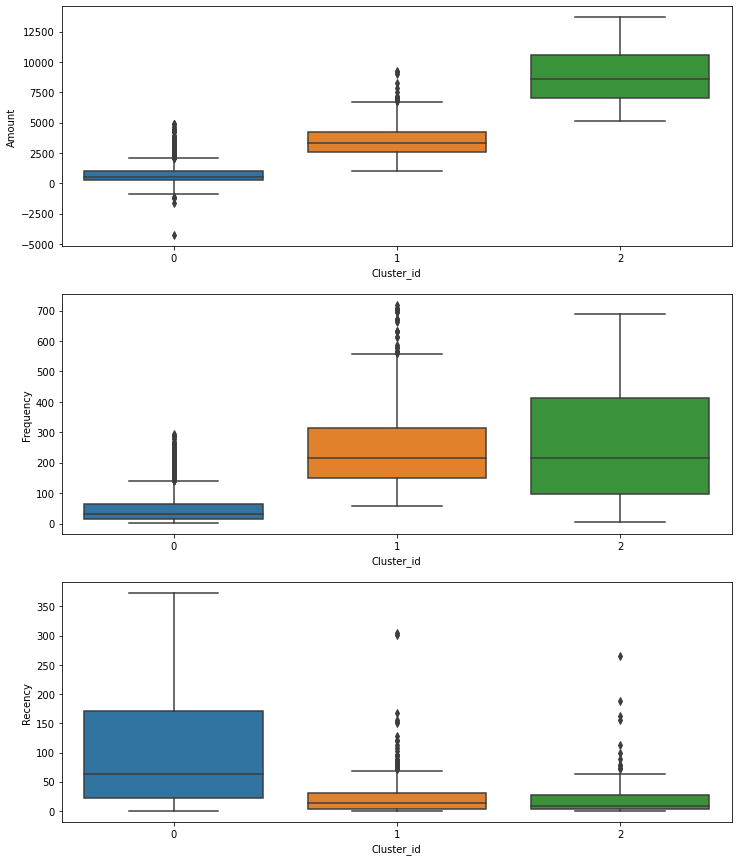

In [43]:
#Checking outliers
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
sns.boxplot(x='Cluster_id',  y='Amount', data=prep_df)
plt.subplot(3,1,2)
sns.boxplot(x='Cluster_id',  y='Frequency', data=prep_df)
plt.subplot(3,1,3)
sns.boxplot(x='Cluster_id',  y='Recency', data=prep_df)
plt.show()